In [552]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [553]:
os.chdir('/content/drive/My Drive/無線網路_室內定位') #切換該目錄
os.listdir()

['ValidationData.csv',
 'TrainingData.csv',
 'output.csv',
 '讀csv檔案.ipynb',
 '無線網路_室內定位書面報告.gdoc',
 'indoor_test.ipynb',
 'indoor_6 2.ipynb',
 'output_TrainingData.csv',
 'output_ValidationData.csv',
 'indoor_6 2.ipynb 的副本']

In [554]:
from posix import system
import csv
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC

In [555]:
#讀檔 => 寫檔
#創建只有 building 0 的資料csv

In [556]:
temp = []
with open('TrainingData.csv', newline='') as csvfile:
  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)

  # 以迴圈輸出每一列
  for row in rows:
    if row[523]== "BUILDINGID" or row[523] == '0':
      temp.append(row)

# 開啟輸出的 CSV 檔案
with open('output_TrainingData.csv', 'w', newline='') as csvfile:
  # 建立 CSV 檔寫入器
  writer = csv.writer(csvfile)

  # 寫入一列資料
  for tep in temp:
    writer.writerow(tep)

In [557]:
temp = []
with open('ValidationData.csv', newline='') as csvfile:
  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile)

 # 以迴圈輸出每一列
  for row in rows:
    if row[523]== "BUILDINGID" or row[523] == '0':
      temp.append(row)

# 開啟輸出的 CSV 檔案
with open('output_ValidationData.csv', 'w', newline='') as csvfile:
  # 建立 CSV 檔寫入器
  writer = csv.writer(csvfile)

  # 寫入一列資料
  for tep in temp:
    writer.writerow(tep)

In [558]:
data_train = pd.read_csv('output_TrainingData.csv')
data_test = pd.read_csv('output_ValidationData.csv')

In [559]:
#-----分析訓練資料-----

In [560]:
data_train[['BUILDINGID','FLOOR']].groupby(['BUILDINGID','FLOOR']).size()

BUILDINGID  FLOOR
0           0        1059
            1        1356
            2        1443
            3        1391
dtype: int64

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

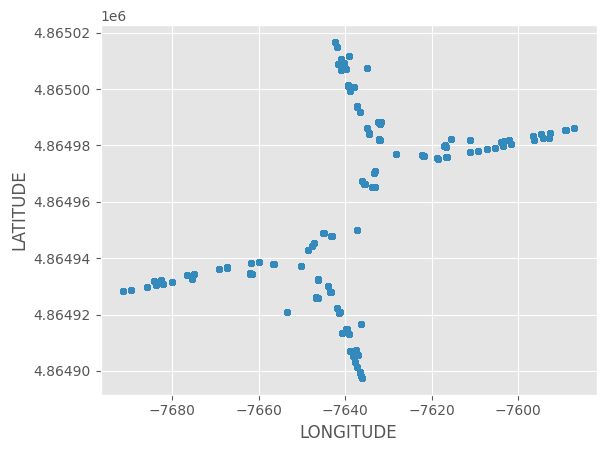

In [561]:
data_train.plot.scatter('LONGITUDE', 'LATITUDE')

In [562]:
#-----分析測試資料-----

In [563]:
data_test[['BUILDINGID','FLOOR']].groupby(['BUILDINGID','FLOOR']).size()

BUILDINGID  FLOOR
0           0         78
            1        208
            2        165
            3         85
dtype: int64

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

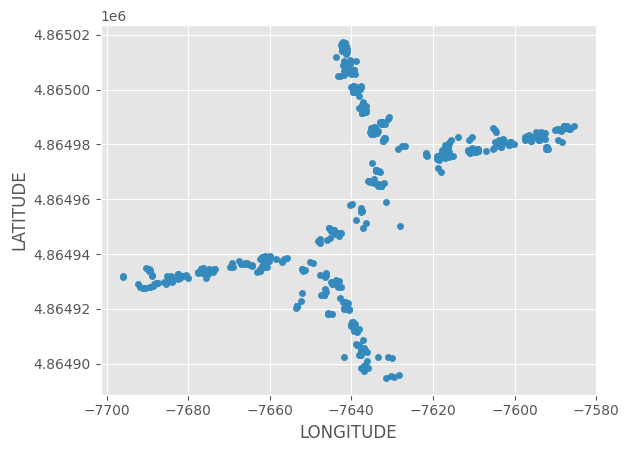

In [564]:
data_test.plot.scatter('LONGITUDE', 'LATITUDE')

In [565]:
#特徵資料
temp_data = data_train.iloc[:, :520]
print(temp_data)

      WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  \
0        100     100     100     100     100     100     100     100     100   
1        100     100     100     100     100     100     100     100     100   
2        100     100     100     100     100     100     100     100     100   
3        100     100     100     100     100     100     100     100     100   
4        100     100     100     100     100     100     100     100     100   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5244     100     100     100     100     100     100     100     100     100   
5245     100     100     100     100     100     100     100     100     -75   
5246     100     100     100     100     100     100     100     100     -88   
5247     100     100     100     100     100     100     100     100     -66   
5248     100     100     100     100     100     100     100     100     -70   

      WAP010  ...  WAP511  WAP512  WAP5

In [566]:
#標籤
temp_label = data_train.iloc[:, 522:523]
print(temp_label)

      FLOOR
0         0
1         0
2         0
3         0
4         0
...     ...
5244      3
5245      3
5246      3
5247      3
5248      3

[5249 rows x 1 columns]


In [567]:
#將資料分成兩個部分：訓練資料與測試資料 訓練0.8 測試0.2
train_data , test_data , train_label , test_label = train_test_split(temp_data,temp_label,test_size=0.2)

In [568]:
#改knn值
knn = KNeighborsClassifier(n_neighbors=1)
#將資料做訓練
knn.fit(temp_data,temp_label)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [569]:
#-----預測資料處理-----

In [570]:
#取得 ValidationData.csv 的特徵
temp_data_test = data_test.iloc[:, :520]

In [571]:
print(knn.predict(temp_data_test))

[3 0 2 2 1 0 1 0 0 0 0 0 0 0 1 2 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 2 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 2 2 2 2 2 2 3
 2 1 3 2 2 2 1 1 1 1 1 1 1 1 1 1 2 1 3 1 3 2 3 1 1 2 0 0 0 0 1 0 3 3 3 3 3
 3 3 2 3 0 3 3 3 3 3 3 2 3 3 3 2 3 0 1 3 1 1 1 1 3 1 1 1 3 3 3 3 3 1 0 1 1
 0 1 1 1 2 2 2 3 2 2 2 2 3 3 3 2 3 2 2 2 0 2 2 3 2 3 2 2 2 2 3 2 2 2 2 2 2
 2 2 2 1 1 0 1 0 2 1 1 1 1 1 1 1 2 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 2 1 1 3 3 2 2 2 2 3 3 3 3 3 2 1 1 1 1 1 1 1 1 1 1 0 1 1 2 1 1 2 1 1 3
 1 2 1 3 1 1 1 1 2 2 0 1 1 3 1 1 3 1 3 2 3 1 2 3 1 3 3 3 1 2 2 2 2 2 2 2 3
 3 1 2 2 2 3 3 2 2 3 2 2 2 2 2 3 2 1 1 2 2 3 2 1 2 2 2 2 1 2 0 3 1 2 2 2 2
 1 3 2 2 0 2 1 2 1 1 1 1 1 2 1 0 3 1 2 1 2 1 0 0 2 1 2 1 2 1 2 1 1 2 0 3 1
 3 0 2 2 1 2 1 0 1 2 1 3 2 1 1 1 0 1 3 3 1 0 3 1 3 3 1 1 1 3 3 2 3 3 3 2 1
 3 2 3 0 1 3 1 1 1 3 1 1 3 3 2 3 3 3 3 3 3 0 3 3 3 3 0 2 0 3 0 2 0 3 3 3 3
 3 3 1 0 0 2 2 2 3 3 2 0 

In [572]:
data_pred_temp = []
for index in knn.predict(temp_data_test):
  data_pred_temp.append(index)
print(data_pred_temp)

[3, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 2, 1, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 3, 2, 3, 1, 1, 2, 0, 0, 0, 0, 1, 0, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 0, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 0, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 3, 1, 2, 1, 3, 1, 1, 1, 1, 2, 2, 0, 1, 1, 3, 1, 1, 3, 1, 3, 2, 3, 1, 2, 3, 1, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 3, 

In [573]:
#-----ValidationData.csv的資料處理-----

In [574]:
print(data_test.iloc[:, 522:523])
print(data_test.iloc[:, 522:523]["FLOOR"])

     FLOOR
0        2
1        1
2        2
3        2
4        1
..     ...
531      2
532      1
533      0
534      0
535      0

[536 rows x 1 columns]
0      2
1      1
2      2
3      2
4      1
      ..
531    2
532    1
533    0
534    0
535    0
Name: FLOOR, Length: 536, dtype: int64


In [575]:
data_test_temp = []
for index in data_test.iloc[:, 522:523]["FLOOR"]:
  data_test_temp.append(index)
print(data_test_temp)

[2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 3, 1, 2, 1, 3, 1, 1, 1, 1, 3, 2, 1, 2, 1, 3, 1, 0, 2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 

In [576]:
#建構混淆矩陣
confusion = []
for k in range(4):
  confusion.append([])
  for l in range(4):
    confusion[k].append(0)
n = 0
for i in data_pred_temp:
  confusion[i][data_test_temp[n]] += 1
  n += 1
print(confusion)

[[69, 24, 5, 3], [6, 170, 7, 0], [3, 14, 111, 7], [0, 0, 42, 75]]


Text(0.5, 3.722222222222216, 'Predict label')

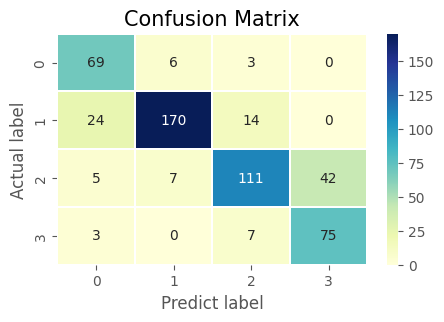

In [577]:
import sklearn.metrics as skm
cm = skm.confusion_matrix(y_true = data_test_temp, y_pred = data_pred_temp)

# 用 seaborn 畫
import seaborn as sns
plt.figure(figsize=(5, 3))
labels=np.arange(4)
sns.heatmap(
    cm, xticklabels=labels, yticklabels=labels,
    annot=True, linewidths=0.1, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix', fontsize=15)
plt.ylabel('Actual label')
plt.xlabel('Predict label')

In [578]:
from sklearn.metrics import accuracy_score
print("準確率：")
print(accuracy_score(data_test_temp, data_pred_temp))

準確率：
0.792910447761194
